In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("Telecom_customer churn (100000).csv")

In [2]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)

change_mou=num_df['change_mou']
change_rev=num_df['change_rev']
num_df=num_df.drop(['change_mou'], axis=1)
num_df=num_df.drop(['change_rev'], axis=1)

num_df=num_df.drop(['Customer_ID'], axis=1)

churn=num_df['churn']
num_df=num_df.drop(['churn'], axis=1)

#BOX-COX
#lemda=0.5
#num_df=(num_df**lemda)
#num_df=num_df-1
#num_df[num_df < 0]=0
#num_df=num_df.div(lemda)
#End BOX-COX
#Z-score
#num_df=(num_df-num_df.min())/(num_df.std(ddof=0)) ##Z-score

#Log
num_df=round(np.log(num_df.add(1)),2)
num_df=num_df.replace([np.inf, -np.inf], np.nan)
#End Log

num_df=num_df.fillna(conData)

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df[result_df < 0]=0

result_df_op=result_df
#result_df_op=result_df_op.drop(['churn'], axis=1)
#result_df_op=np.nan_to_num(result_df_op)

X=result_df_op
#y=result_df['churn'] 
y=churn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log


In [3]:
X_train=X
y_train=y
#Univariate Selection
from sklearn.feature_selection import SelectKBest, chi2
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)


,Feature,Scores
76,crclscod,1803.718570
32,mouiwylisv_Mean,543.543293
39,mou_opkv_Mean,490.794990
22,ccrndmou_Mean,474.621785
31,iwylis_vce_Mean,451.771701
23,cc_mou_Mean,422.894192
77,asl_flag,415.391673
26,mou_cvce_Mean,387.201183
21,custcare_Mean,376.980953
28,mou_rvce_Mean,341.931592


In [4]:
x_train_chi = select_feature.transform(x_train)

NameError: name 'x_train' is not defined

In [26]:
X_train=x_train_chi
y_train=y

In [5]:
#X_train=X
#y_train=y
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  

rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X, y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [23]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

rfecv = RFECV(estimator=classifier, step=1, cv=1, scoring='accuracy')
rfecv = rfecv.fit(X, y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [18]:

from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

rfe = RFE(classifier, 3)
rfe = rfe.fit(X,y)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [ ]:
X_data=X
X_train = rfecv.transform(X_data)

In [33]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

36581 13857 31915 17647
pod:  0.356059077519067
pof:  0.27473333597684285
AUC:  0.5406628707711121
roc_auc:  0.5824684768007163
auc:  0.5406628707711121


In [4]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X, y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 19
Best features : Index(['mou_Mean', 'totmrc_Mean', 'vceovr_Mean', 'comp_vce_Mean',
       'mou_cvce_Mean', 'peak_vce_Mean', 'mou_peav_Mean', 'mou_opkv_Mean',
       'complete_Mean', 'months', 'totcalls', 'totrev', 'adjrev', 'avg3mou',
       'avg3qty', 'hnd_price', 'eqpdays', 'asl_flag', 'hnd_webcap'],
      dtype='object')


In [5]:
X_data=X
X_train = rfecv.transform(X_data)

In [6]:
X_train

array([[5.39, 3.16, 0.  , ..., 5.89, 0.  , 3.  ],
       [6.18, 3.65, 2.31, ..., 5.48, 0.  , 2.  ],
       [2.42, 2.89, 0.  , ..., 7.32, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 6.07, 0.  , 3.  ],
       [0.  , 0.  , 0.  , ..., 4.33, 0.  , 3.  ],
       [0.  , 0.  , 0.  , ..., 1.79, 0.  , 3.  ]])

In [7]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

23867 26571 16302 33260
pod:  0.6710786489649329
pof:  0.5268051865656846
AUC:  0.5721367311996242


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()

rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X, y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Optimal number of features : 91


NameError: name 'x_train' is not defined

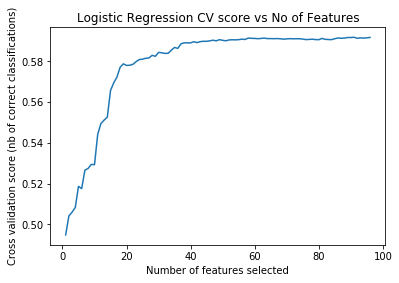

In [9]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [16]:
feature_names=['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
       'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean',
       'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean',
       'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean',
       'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean',
       'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean',
       'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean',
       'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean',
       'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean',
       'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean',
       'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs',
       'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev',
       'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou',
       'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv',
       'lor', 'adults', 'income', 'numbcars', 'forgntvl', 'eqpdays',
       'new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
#feature_names
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'adults', 'income', 'numbcars',

In [22]:
from sklearn.model_selection import cross_val_score
X_new = X[new_features]
initial_score = cross_val_score(classifier, X, y, cv=10, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score  = cross_val_score(classifier, X_new, y, cv=10, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Initial accuracy : 0.578309708381397 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy after Feature Selection : 0.5784596753822966 


In [ ]:
x_train = rfecv.transform(X)

In [15]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

29286 21152 20882 28680
pod:  0.5786691416811267
pof:  0.41936635076727863
AUC:  0.579651395456924


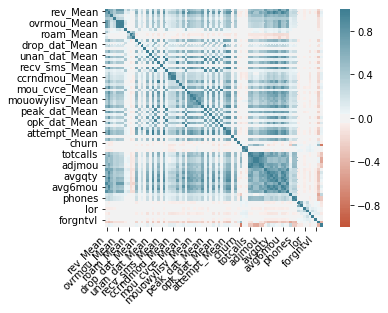

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

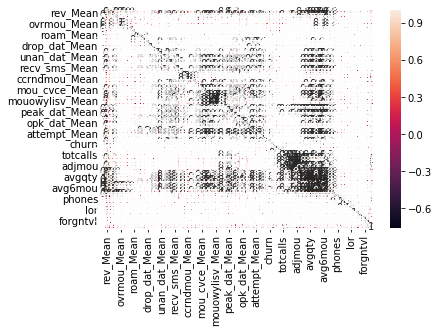

In [4]:
sns.heatmap(df.corr(), annot = True, fmt='.1g')